<a href="https://colab.research.google.com/github/yazim1/Final-year-project/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Long Short-term memory(LSTM) reccurent neural network to predict the price of gold EDA

In [8]:
#importing the libraries we need for EDA
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')


In [5]:
#importing the dataset for gold from yahoo finance 'GC=F'
df = yf.download('GC=F', start='2012-01-01', end='2021-01-01')
#showing the dataset for gold
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1568.900024,1604.300049,1566.000000,1599.699951,1599.699951,229
2012-01-04,1596.599976,1618.599976,1594.500000,1611.900024,1611.900024,172
2012-01-05,1610.800049,1624.099976,1597.800049,1619.400024,1619.400024,362
2012-01-06,1622.500000,1627.800049,1616.099976,1616.099976,1616.099976,20
2012-01-09,1614.300049,1620.099976,1607.500000,1607.500000,1607.500000,8
...,...,...,...,...,...,...
2020-12-24,1877.300049,1879.900024,1875.699951,1879.900024,1879.900024,46
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75
2020-12-29,1881.300049,1881.300049,1879.699951,1879.699951,1879.699951,343


In [ ]:
#Number of rows and collumns in the dataset
df.shape

(2262, 6)

In [12]:
df.dtypes

Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Daily_Return             float64
Volatility               float64
Annualized_Volatility    float64
dtype: object

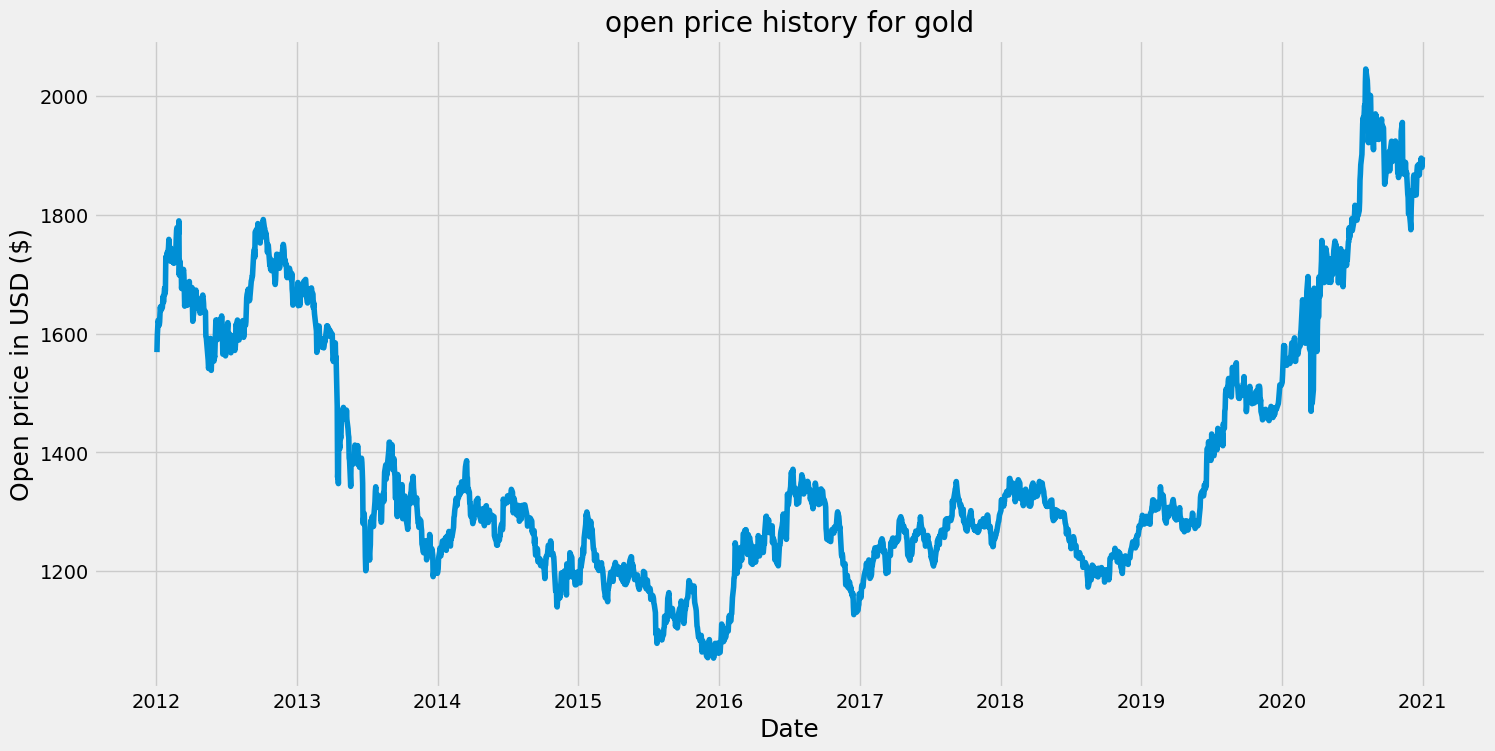

In [ ]:
#visual of each variable

#open price
plt.figure(figsize=(16,8))
plt.title('open price history for gold')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open price in USD ($)', fontsize=18)
plt.show()


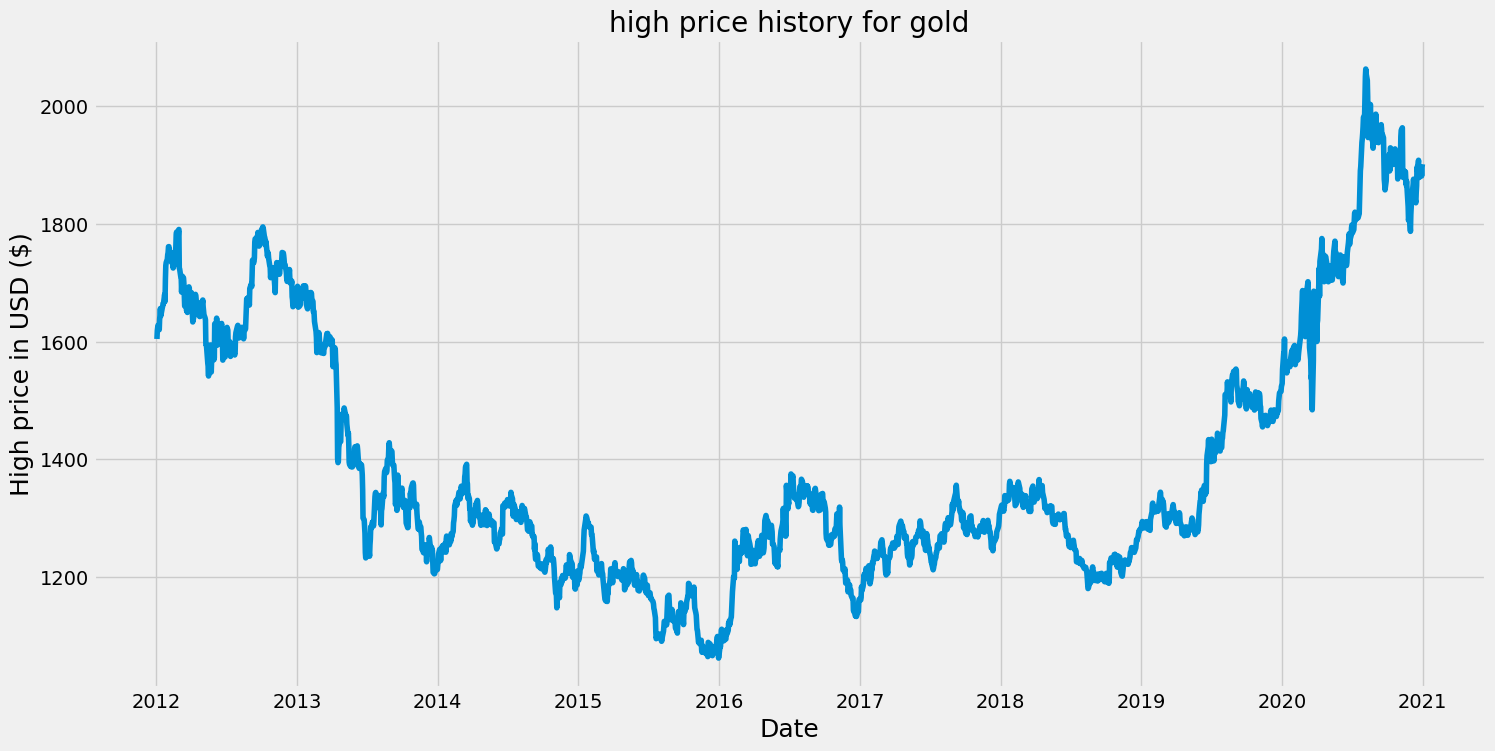

In [ ]:
#high price
plt.figure(figsize=(16,8))
plt.title('high price history for gold')
plt.plot(df['High'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('High price in USD ($)', fontsize=18)
plt.show()

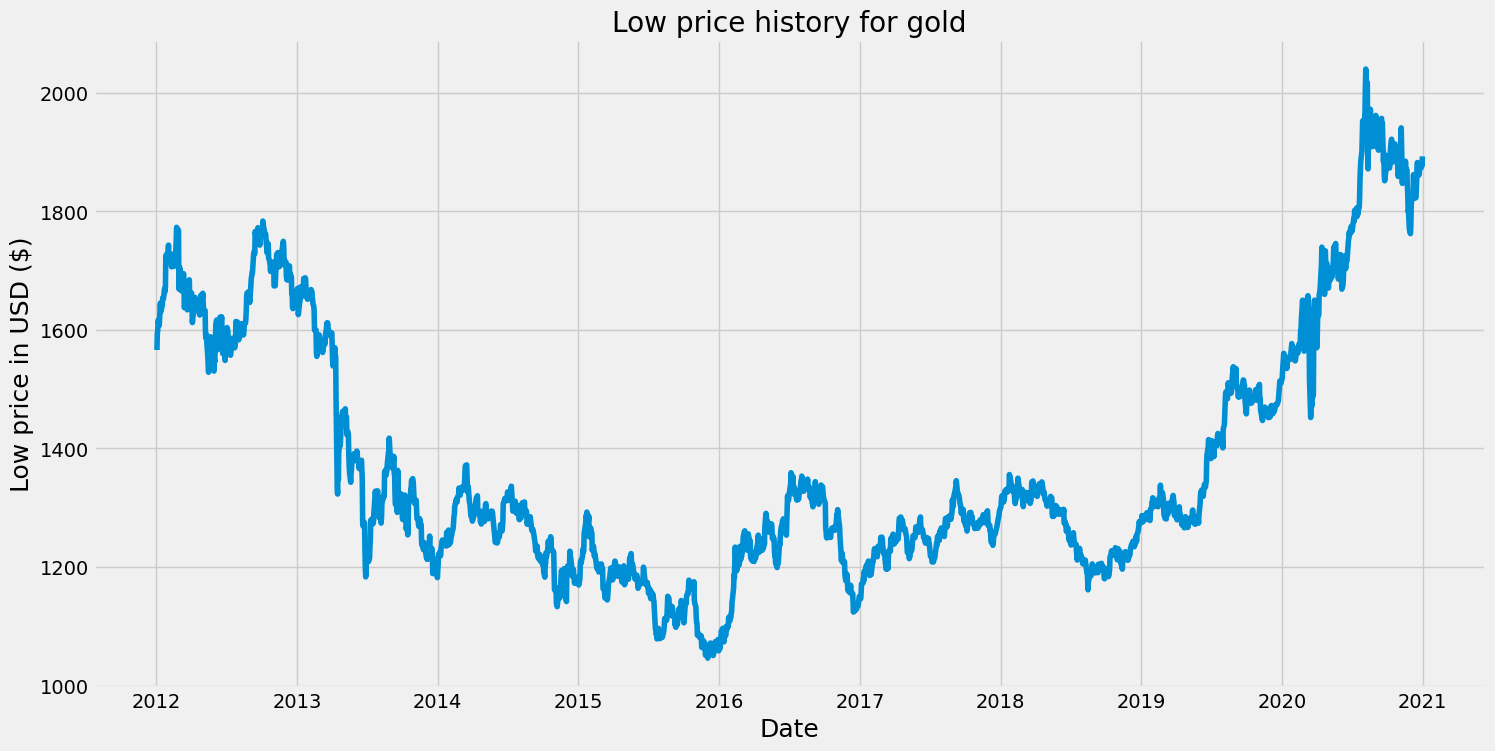

In [ ]:
#Low price
plt.figure(figsize=(16,8))
plt.title('Low price history for gold')
plt.plot(df['Low'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low price in USD ($)', fontsize=18)
plt.show()

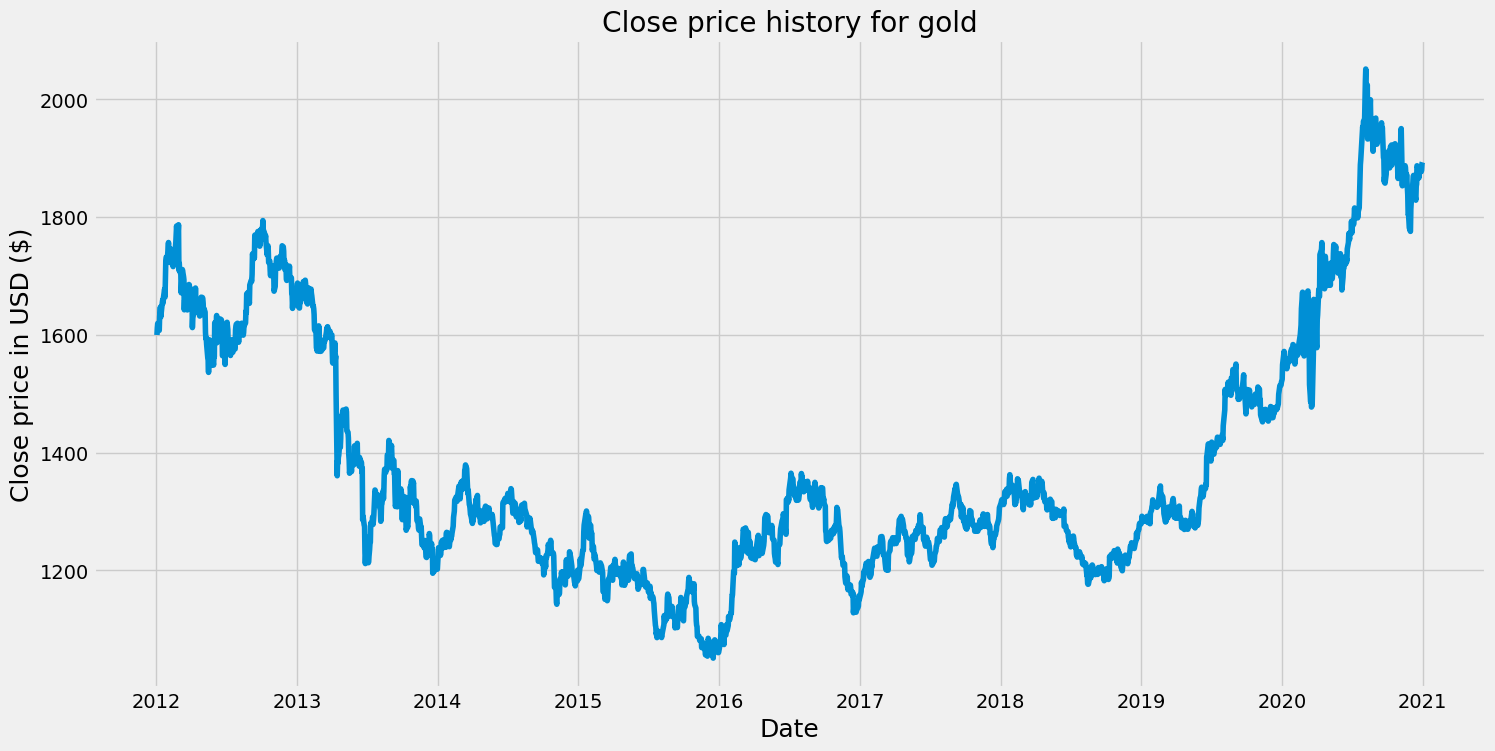

In [ ]:
#Close price
plt.figure(figsize=(16,8))
plt.title('Close price history for gold')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.show()

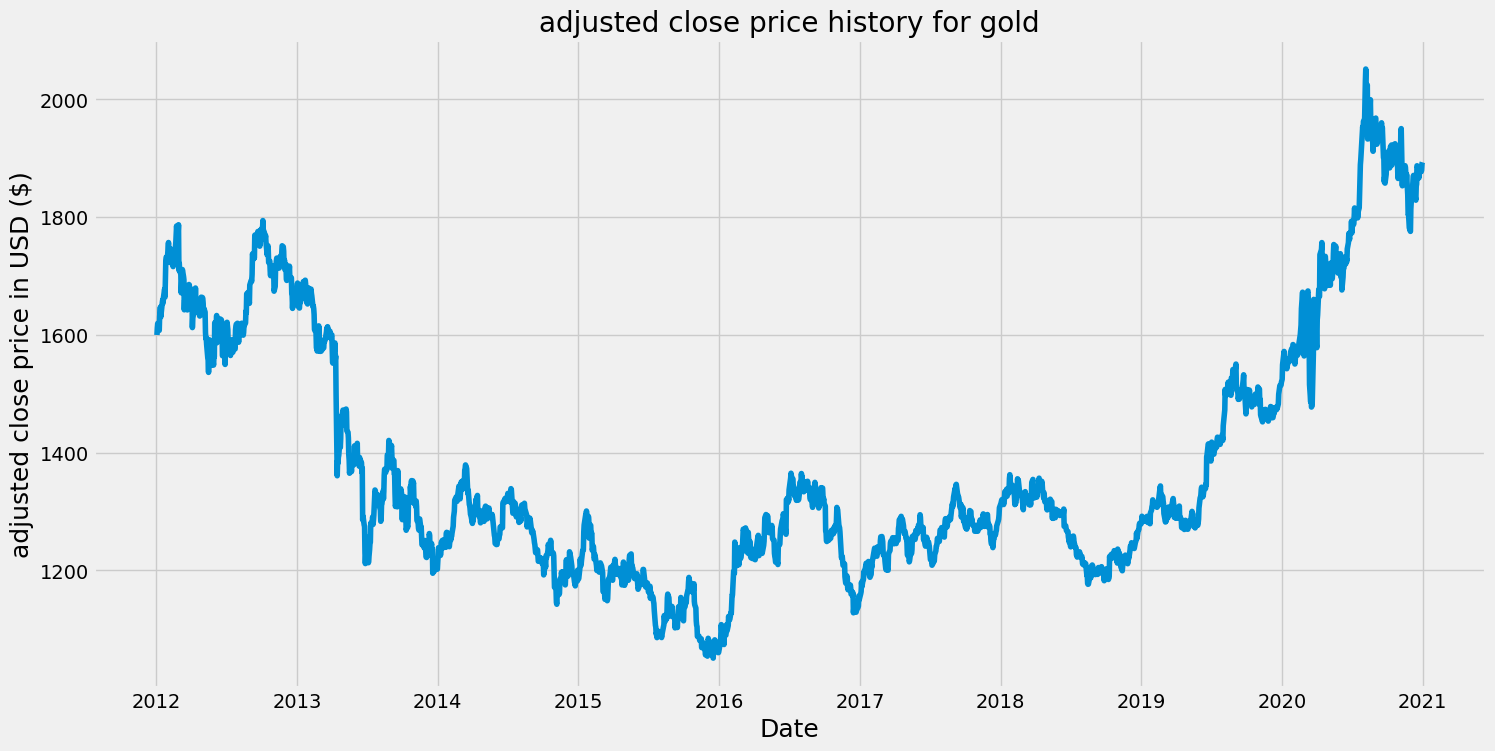

In [ ]:
#Adjusted close price
plt.figure(figsize=(16,8))
plt.title('adjusted close price history for gold')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('adjusted close price in USD ($)', fontsize=18)
plt.show()

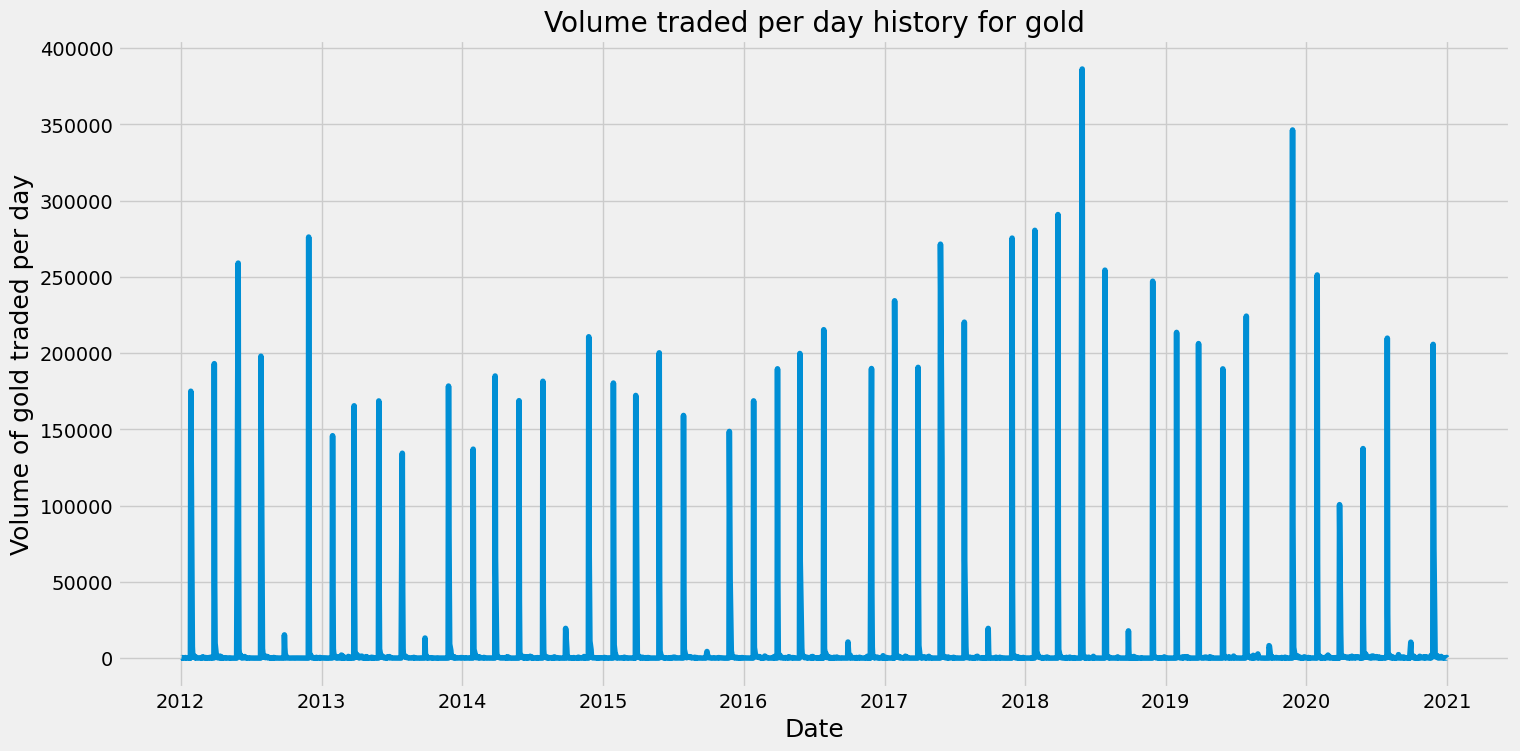

In [ ]:
#Volume traded per day
plt.figure(figsize=(16,8))
plt.title('Volume traded per day history for gold')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume of gold traded per day', fontsize=18)
plt.show()

As we can see the price of gold has been very volatile between 2012 and 2021. If you had bought gold in 2016 at a low and sold it in 2021 you would have doubled your investment.

In [ ]:
#Checking for any missing values in the data set
missing_values = df.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#getting the summary  for the data frame
summary = df.describe()
print(summary)

              Open         High          Low        Close    Adj Close         Volume
count  2262.000000  2262.000000  2262.000000  2262.000000  2262.000000    2262.000000
mean   1382.914279  1389.701283  1375.664103  1382.754642  1382.754642    5689.170203
std     214.654033   216.294978   212.764920   214.717758   214.717758   30931.859063
min    1053.699951  1062.000000  1046.199951  1050.800049  1050.800049       0.000000
25%    1232.325043  1240.100006  1227.350037  1233.599976  1233.599976      37.000000
50%    1300.399963  1306.350037  1294.449951  1301.099976  1301.099976     134.500000
75%    1545.824951  1552.299957  1528.500000  1542.050018  1542.050018     443.500000
max    2045.500000  2063.000000  2040.000000  2051.500000  2051.500000  386334.000000


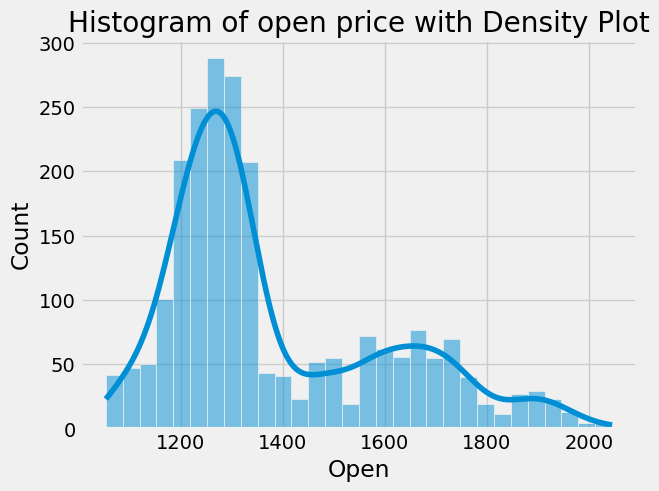

In [14]:
#creating histograms for each column to see the distributions of each one
sns.histplot(df['Open'], kde=True, bins=30)
plt.title('Histogram of open price with Density Plot')
plt.show()

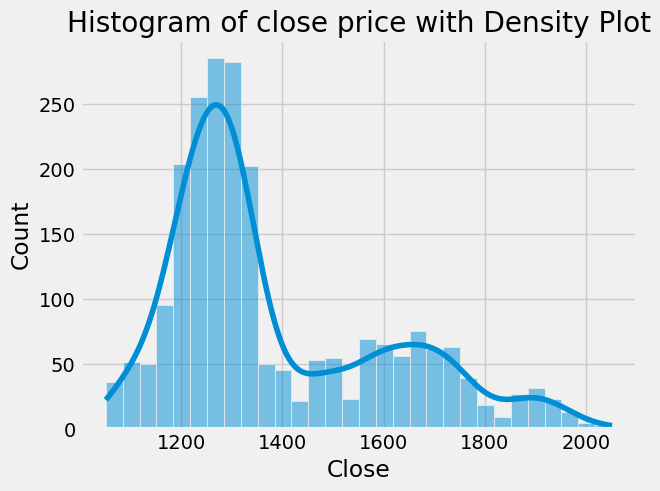

In [15]:
sns.histplot(df['Close'], kde=True, bins=30)
plt.title('Histogram of close price with Density Plot')
plt.show()

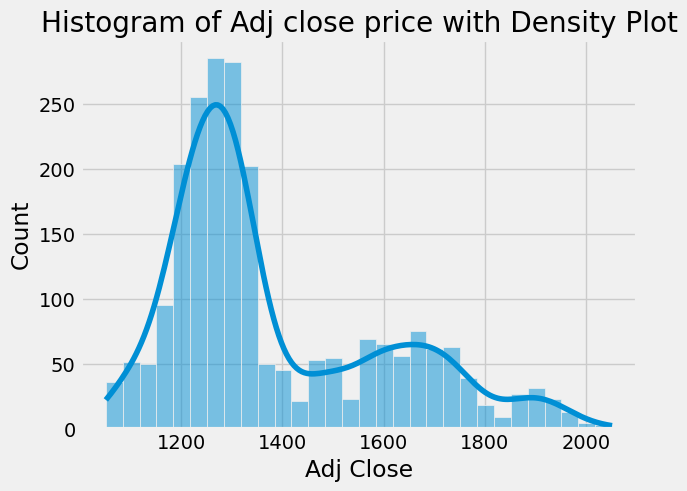

In [16]:
sns.histplot(df['Adj Close'], kde=True, bins=30)
plt.title('Histogram of Adj close price with Density Plot')
plt.show()

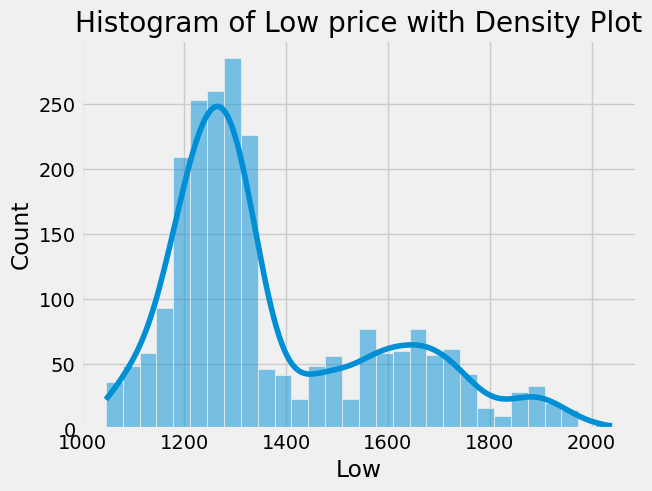

In [17]:
sns.histplot(df['Low'], kde=True, bins=30)
plt.title('Histogram of Low price with Density Plot')
plt.show()

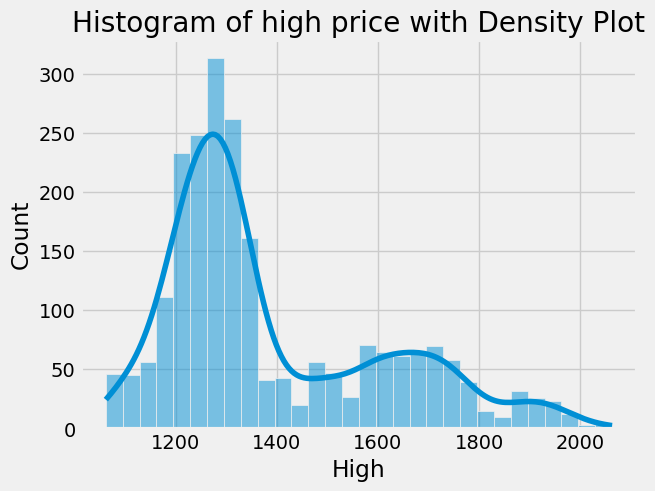

In [18]:
sns.histplot(df['High'], kde=True, bins=30)
plt.title('Histogram of high price with Density Plot')
plt.show()

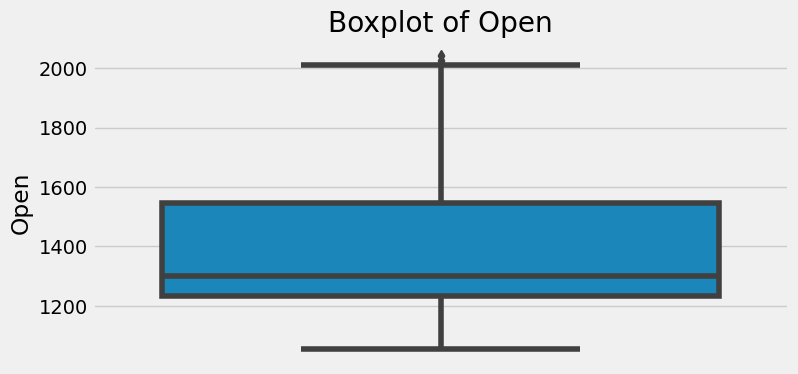

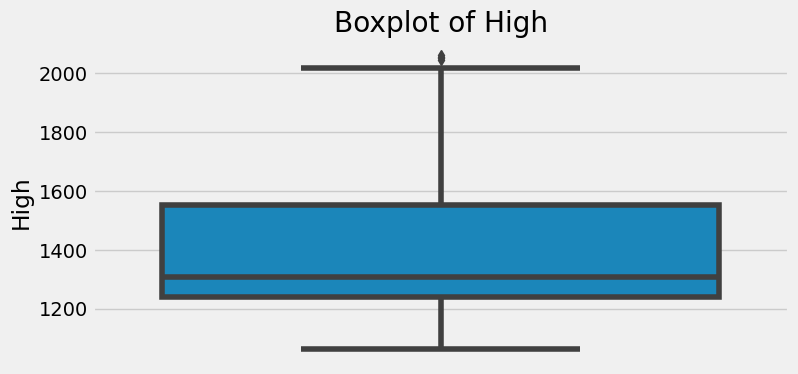

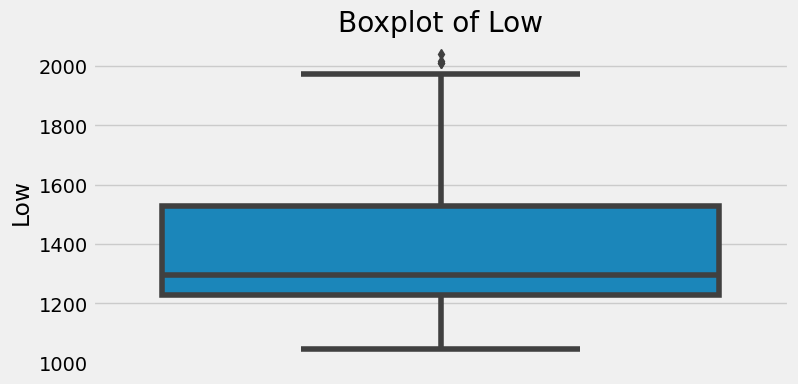

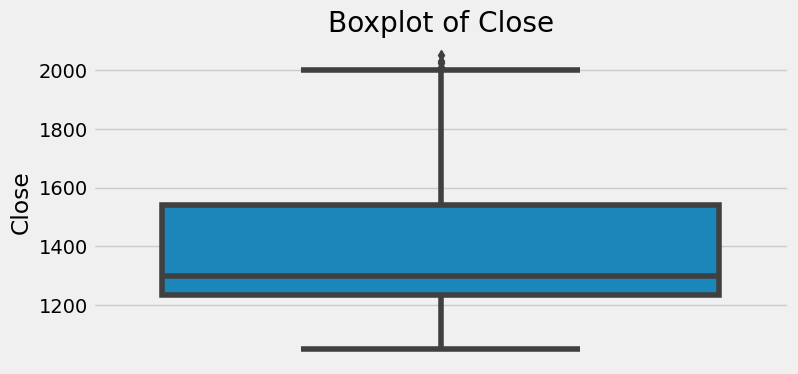

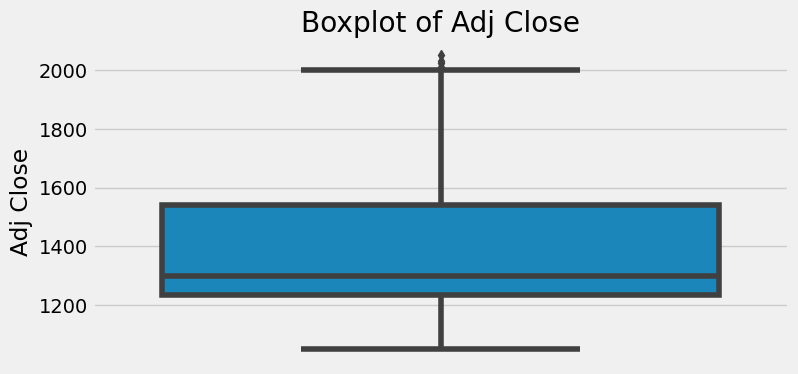

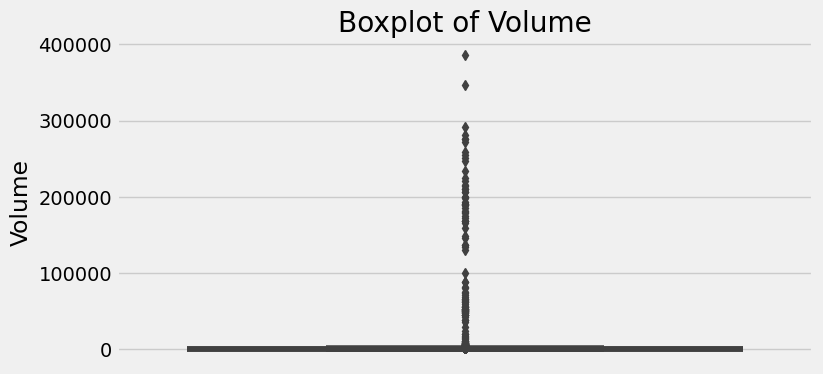

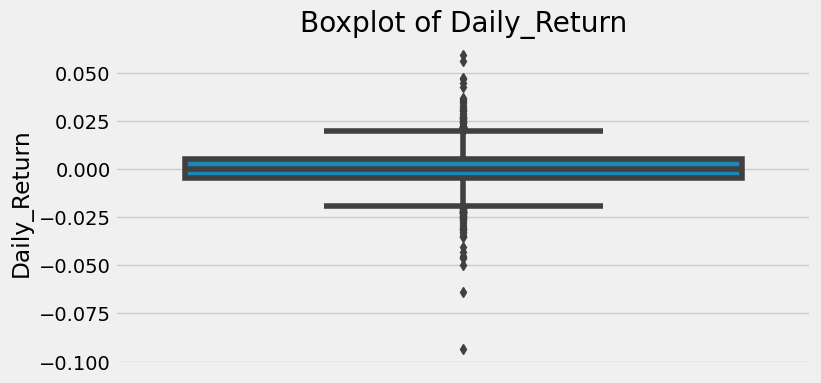

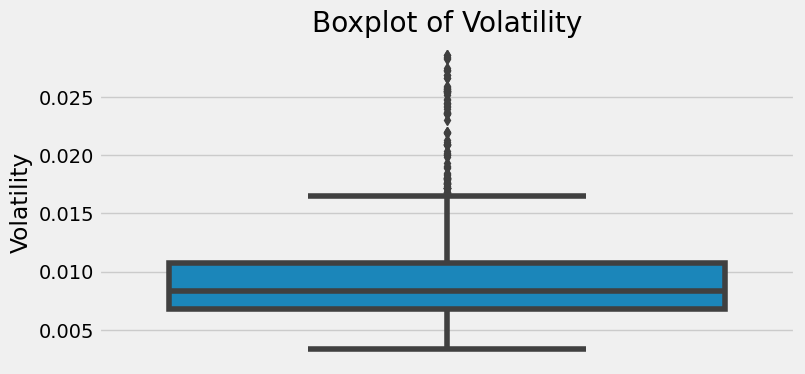

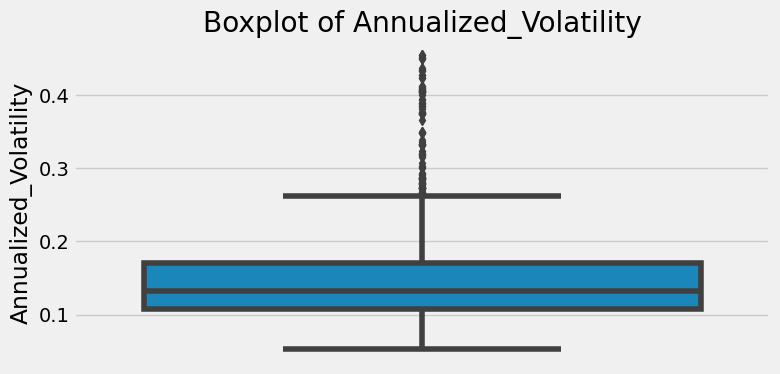

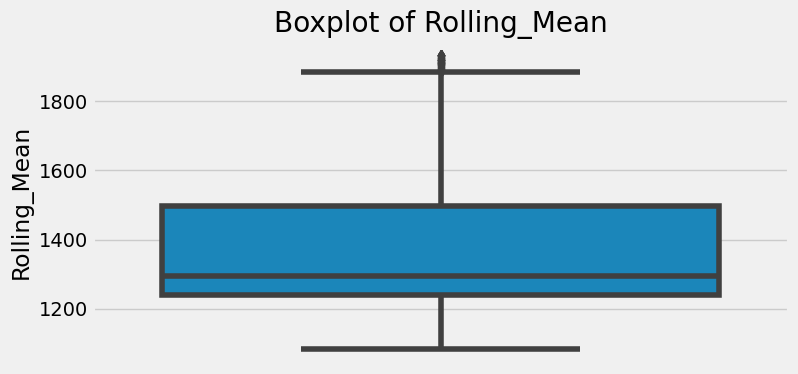

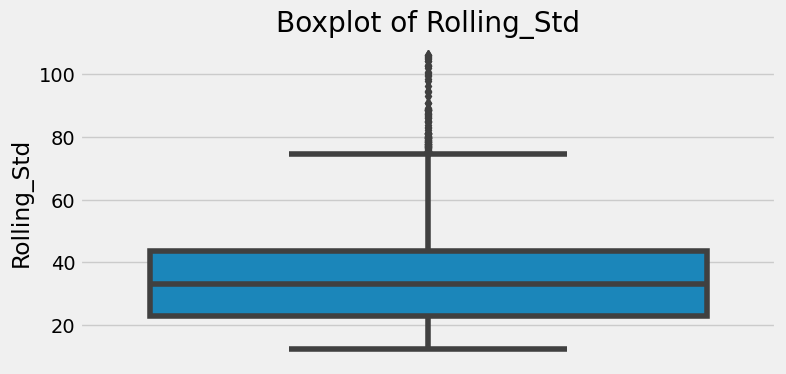

In [21]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

computing rolling statistics for the dataset


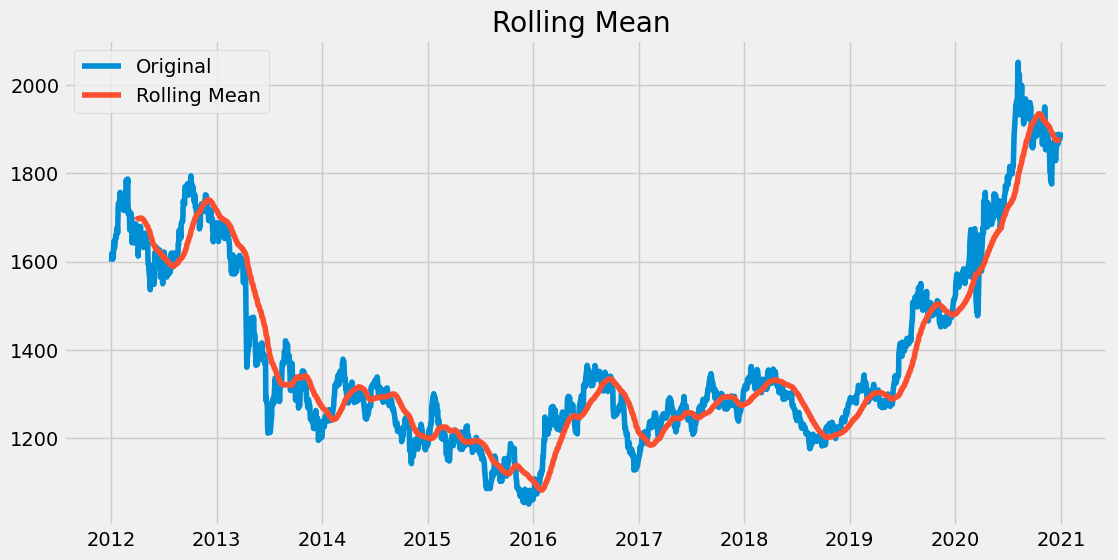

In [19]:
#calculating rolling mean
rolling_mean = df['Adj Close'].rolling(window=60).mean()

#calculating rolling standard deviation
rolling_std = df['Adj Close'].rolling(window=60).std()

#adding these as new columns
df['Rolling_Mean'] = rolling_mean
df['Rolling_Std'] = rolling_std

plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend()
plt.title('Rolling Mean ')
plt.show()

In [6]:
df['Daily_Return'] = df['Close'].pct_change()

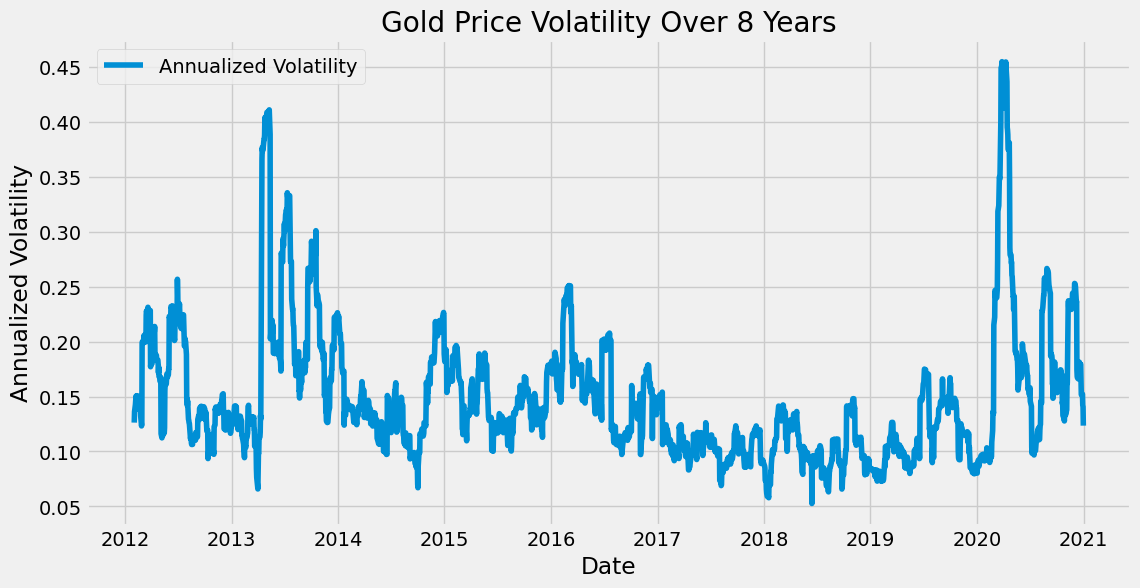

In [7]:
window_size = 21 #21 trading days in a month
df['Volatility'] = df['Daily_Return'].rolling(window=window_size).std()
df['Annualized_Volatility'] = df['Volatility'] * np.sqrt(252)  #252 trading days in a year
plt.figure(figsize=(12, 6))
plt.plot(df['Annualized_Volatility'], label='Annualized Volatility')
plt.title('Gold Price Volatility Over 8 Years')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()


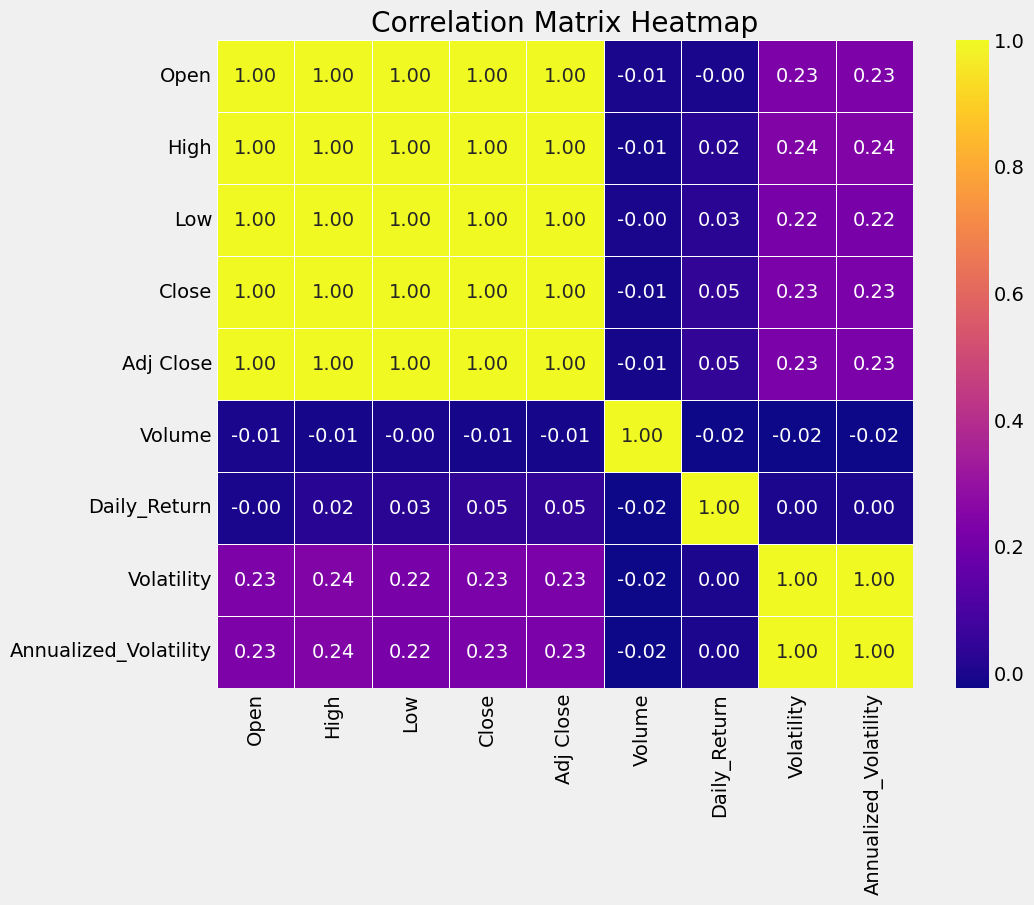

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()